# Classification με MLP neural network
## Μείωση διαστάσεων Principal component anaysis & Linear Discriminant Analysis
- Επιλέχθηκαν 1000 εικόνες από την κάθε κλάση και τοποθετήθηκαν στον αντίστοιχο φάκελο χειροκίνητα, η επιλογή έγινε με βάση τα ελάχιστα δεδομένα που απαιτούσε η εργασία.
- θυμίζω έγινε ενα χώρισμα των κλάσεων ανάμεσα σε εμένα (Οδυσσέας) και την Δήμητρα λόγω προβλήματος έλλειψης labels στα δικά της data, όπως είχαμε συζητήσει ακι στο μάθημα.

## Άνοιγμα των φακέλων διαδοχικά και εισαγωγή των εικόνων σε numpy arrays

In [1]:
# Load images and labels
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# # Define the input directory
input_dir = '/Users/odys/Desktop/ML_LOCAL_MAC/archive_1000pics'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                try:
                    # Open and preprocess the image
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    
                    # Append the image and its label
                    images.append(img_array)
                    labels.append(category)  # Use the folder name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the loaded data
print(f"Loaded {len(images)} images.")
print(f"Image shape: {images[0].shape} ")
print(f"Labels: {np.unique(labels)}")


Loaded 4000 images.
Image shape: (64, 64) 
Labels: ['AbdomenCT' 'BreastMRI' 'Hand' 'HeadCT']


## Χώρισμα των δεδομένων σε train και test σύνολα.
 

In [2]:
from sklearn.model_selection import train_test_split

# Set random_state for reproducibility
random_state = 42

# Split into train and test only
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.3, random_state=random_state, stratify=labels
)

print(f"Shape Train set: {X_train.shape}, labels: {y_train.shape}")
print(f"Shape Test set: {X_test.shape}, labels:{y_test.shape}")

Shape Train set: (2800, 64, 64), labels: (2800,)
Shape Test set: (1200, 64, 64), labels:(1200,)


##  Κανονικοποίηση & Principal component analysis
- Πριν την pca  εφαρμόσηκε «flatten» στα δεδομένα των εικόνων από (1000, 64,64)(1000, 4096) και κανονικοποίηση των τιμών των pixels με χρήση του standard scaler scikit learn [1]. Τα δεδομένα καταλήγουν με αυτόν τον τρόπο να έχουν μέση τιμή = 0 και τυπική απόκλιση=1.
- Επιλέχθηκε να "μειωθούν" οι εικόνεσ σε τόσα components, έτσι ώστε να διατηρηθεί τουλάχιστον το 90% του explained variance.
- Γ. Παναγάκης, L06-Διαστατικότητα των δεδομένων και PCA (Σειμειώσεις μαθήματος "Μηχανική μάθηση"), 2025. 
- A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, O’Reilly, 2022, p. 247.


Flattened images shape: (2800, 4096)
Standardized flattened images shape: (2800, 4096)
Number of components to explain at least 90% variance: 99


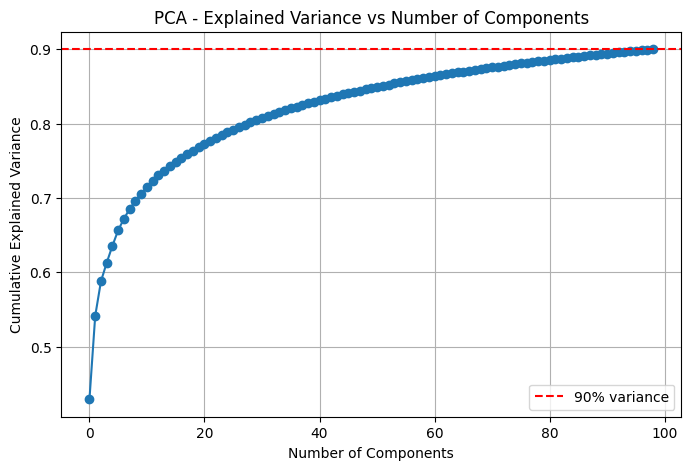

Original shape: (2800, 4096)
PCA reduced shape: (2800, 99)


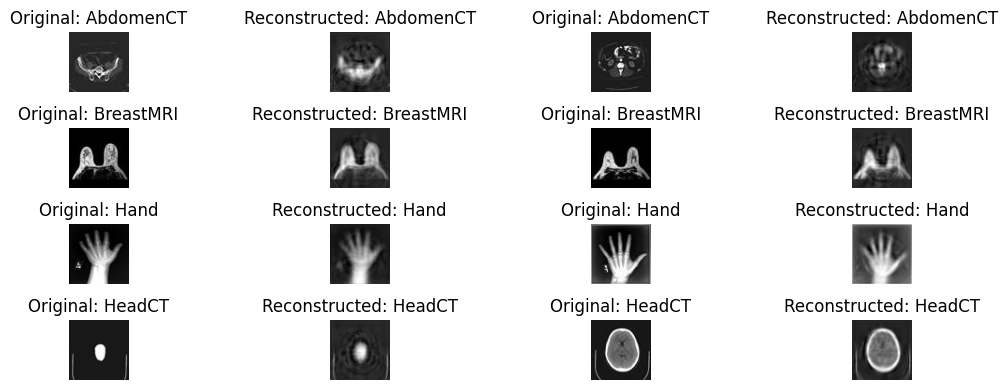

Original image and its PCA vector for each class:



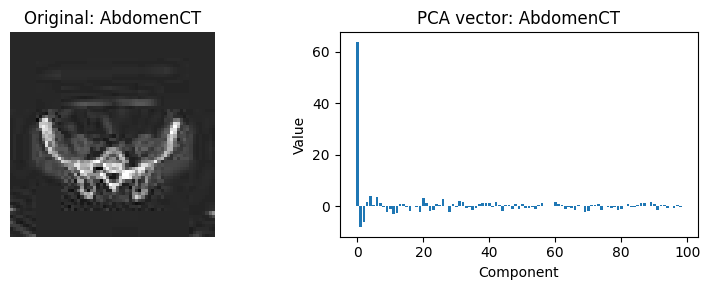

Class: AbdomenCT, PCA vector (first 10 components):
[63.93162429 -8.18977236 -6.00068652  1.65021872  4.0605337   0.64489745
  3.80017801  1.38884297 -0.06843822 -2.21262636]



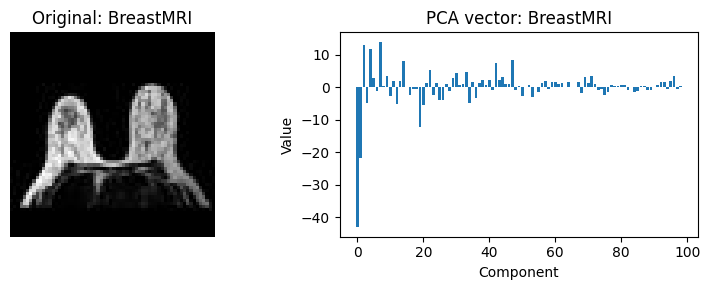

Class: BreastMRI, PCA vector (first 10 components):
[-43.12754752 -21.8493091   12.88196359  -4.86479354  11.91887087
   2.7792897   -1.2432994   14.06298742   0.55218399   3.43277187]



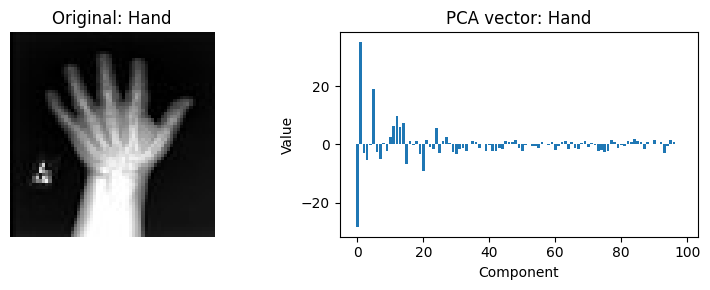

Class: Hand, PCA vector (first 10 components):
[-28.43248885  35.24944149  -2.79427962  -5.25135744  -0.27915133
  18.95039113  -2.42568496  -5.10079797   0.64006074  -2.40290822]



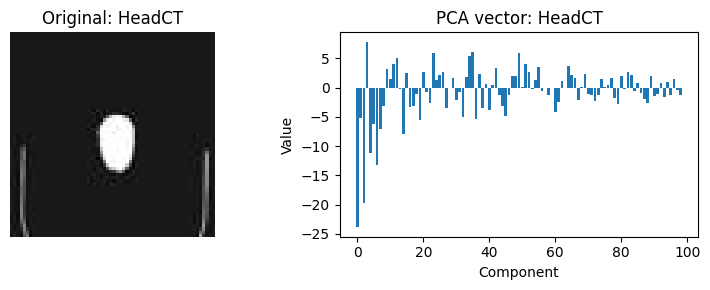

Class: HeadCT, PCA vector (first 10 components):
[-23.91545341  -5.2770418  -19.68050563   7.85033744 -11.15949932
  -6.22473074 -13.20154793  -7.10053899  -3.18191626   3.16935269]



In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Flatten images for PCA
num_samples = X_train.shape[0]
flattened_images = X_train.reshape(num_samples, -1)
print(f"Flattened images shape: {flattened_images.shape}")

# Standardize
scaler = StandardScaler()
flattened_images_std = scaler.fit_transform(flattened_images)
print(f"Standardized flattened images shape: {flattened_images_std.shape}")

# Fit PCA without reducing dimensions to find explained variance
pca_full = PCA()
pca_full.fit(flattened_images_std)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that explain at least 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain at least 90% variance: {n_components}")

# Now fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(flattened_images_std)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"PCA reduced shape: {principal_components.shape}")

# Plot the first 5 images of the training set
# Inverse transform to reconstruct images from PCA
reconstructed = pca.inverse_transform(principal_components)
reconstructed_images = scaler.inverse_transform(reconstructed)
reconstructed_images = reconstructed_images.reshape(X_train.shape)

# Plot 2 images per class: original vs reconstructed
unique_classes = np.unique(y_train)
images_per_class = 2

plt.figure(figsize=(10, 4))  # Bigger images

plot_idx = 1
for class_label in unique_classes:
    # Find indices for this class
    class_indices = np.where(y_train == class_label)[0][:images_per_class]
    for i, idx in enumerate(class_indices):
        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(X_train[idx], cmap='gray')
        plt.title(f"Original: {class_label}")
        plt.axis('off')
        plot_idx += 1

        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(reconstructed_images[idx], cmap='gray')
        plt.title(f"Reconstructed: {class_label}")
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


# For each class, show an original image and its PCA vector (principal component values)
print("Original image and its PCA vector for each class:\n")
for class_label in unique_classes:
    # Find the first index for this class
    idx = np.where(y_train == class_label)[0][0]
    plt.figure(figsize=(8,3))
    
    # Show the original image
    plt.subplot(1,2,1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Original: {class_label}")
    plt.axis('off')
    
    # Show the principal component vector as a bar plot
    plt.subplot(1,2,2)
    plt.bar(np.arange(n_components), principal_components[idx])
    plt.title(f"PCA vector: {class_label}")
    plt.xlabel("Component")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()
    
    # Print the PCA vector values
    print(f"Class: {class_label}, PCA vector (first 10 components):\n{principal_components[idx][:10]}\n")

## Multi-layer Perceptron με χρήση μειωμένων διαστάσεων με PCA
- Η επιλογή των παραμέτρων βασίστηκε στο βιβλίο Practical deep learning : a python-based introduction, Ronald T. Kneusel, αλλά δοκιμάστικαν και χειροκίνητα διαφορετικές τιμές.
- Εξερετικά αοτελέμσατα ακόμα και μετά από 2 iterations που το loss = 0.52589935 μόνο.
- Ταυτόχρονα είναι οικονομικό ως προς τον χρόνο εκτέλεσης, πράγμα που με έκανε να το συμπαθήσω ιδιαίτερα.

In [4]:
# MLP Neural Network classification with PCA features

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the MLPClassifier
mlp_pca = MLPClassifier(
    hidden_layer_sizes=(100,),  # You can adjust the size and number of layers
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    verbose=True
)

# Flatten images for classification
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)


# Create PCA-reduced features for training and testing
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Fit the model on PCA-reduced training data
mlp_pca.fit(X_train_pca, y_train)

# Predict on test set
y_pred = mlp_pca.predict(X_test_pca)

# Evaluate
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nMLP Classification Report:\n", classification_report(y_test, y_pred))

Iteration 1, loss = 4.36183860
Iteration 2, loss = 0.52589935
Iteration 3, loss = 0.08092615
Iteration 4, loss = 0.03736620
Iteration 5, loss = 0.01999293
Iteration 6, loss = 0.01280347
Iteration 7, loss = 0.00918367
Iteration 8, loss = 0.00700451
Iteration 9, loss = 0.00581744
Iteration 10, loss = 0.00498268
Iteration 11, loss = 0.00437674
Iteration 12, loss = 0.00392459
Iteration 13, loss = 0.00353102
Iteration 14, loss = 0.00322121
Iteration 15, loss = 0.00292522
Iteration 16, loss = 0.00270445
Iteration 17, loss = 0.00249746
Iteration 18, loss = 0.00232508
Iteration 19, loss = 0.00216697
Iteration 20, loss = 0.00202124
Iteration 21, loss = 0.00189475
Iteration 22, loss = 0.00178407
Iteration 23, loss = 0.00167993
Iteration 24, loss = 0.00159004
Iteration 25, loss = 0.00150501
Iteration 26, loss = 0.00142815
Iteration 27, loss = 0.00135951
Iteration 28, loss = 0.00129565
Iteration 29, loss = 0.00123303
Iteration 30, loss = 0.00117846
Iteration 31, loss = 0.00112667
Iteration 32, los

## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  2   0 293   5]
 [  0   0   0 300]]


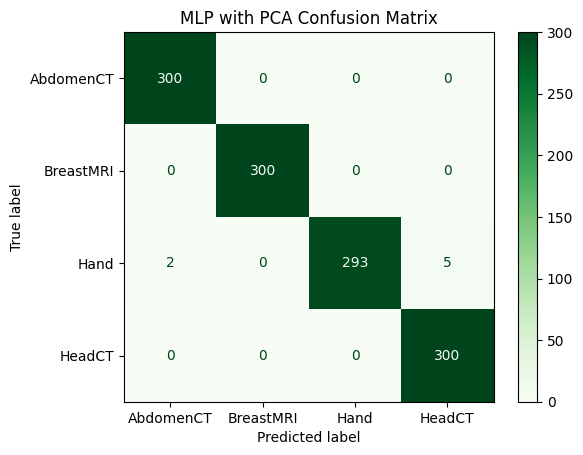

Accuracy: 0.9942
Precision (macro): 0.9942
Recall (macro): 0.9942
F1 Score (macro): 0.9942

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



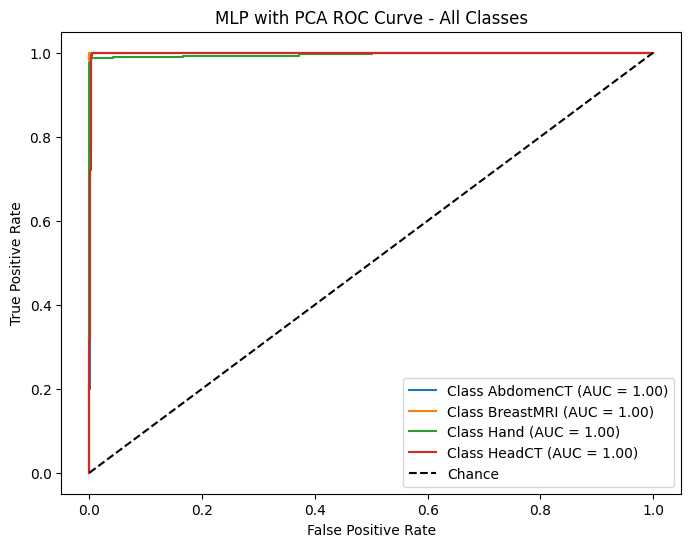

In [5]:
# Assess the model's performance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

def assess_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Assess and visualize the performance of a classifier.
    
    Parameters:
        clf: Trained classifier
        X_test: Test features
        y_test: True test labels
        class_labels: List of class labels (optional)
        title_prefix: String to prefix plot titles (optional)
    """
    # Predict
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"{title_prefix} Confusion Matrix")
    plt.show()

    # Accuracy, Precision, Recall, F1
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC Curve (if possible)
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{title_prefix} ROC Curve - All Classes')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve and AUC not available for this classifier.")

assess_model_performance(mlp_pca, X_test_pca, y_test, class_labels=np.unique(y_train), title_prefix="MLP with PCA")

## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρων (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

In [6]:
# Grid search for best hyperparameters in MLP Neural Network with PCA features

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# GridSearchCV setup
grid_search_MLP_PCA = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Fit on PCA-reduced training data
grid_search_MLP_PCA.fit(X_train_pca, y_train)

# Best parameters and score
print("Best parameters found:", grid_search_MLP_PCA.best_params_)
print("Best cross-validation score:", grid_search_MLP_PCA.best_score_)

# Evaluate on test set
y_pred = grid_search_MLP_PCA.predict(X_test_pca)
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nMLP Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'sgd'}
Best cross-validation score: 0.9946436208098182
MLP Test Accuracy: 0.9941666666666666

MLP Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.99      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       1.00      0.98      0.99       300
      HeadCT       0.98      1.00      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



## Εκτύπωση γραμμής μάθησης για το μοντέλο με μείωση διαστάσεων με PCA

[learning_curve] Training set sizes: [ 186  426  666  906 1146 1386 1626 1866]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.9s finished


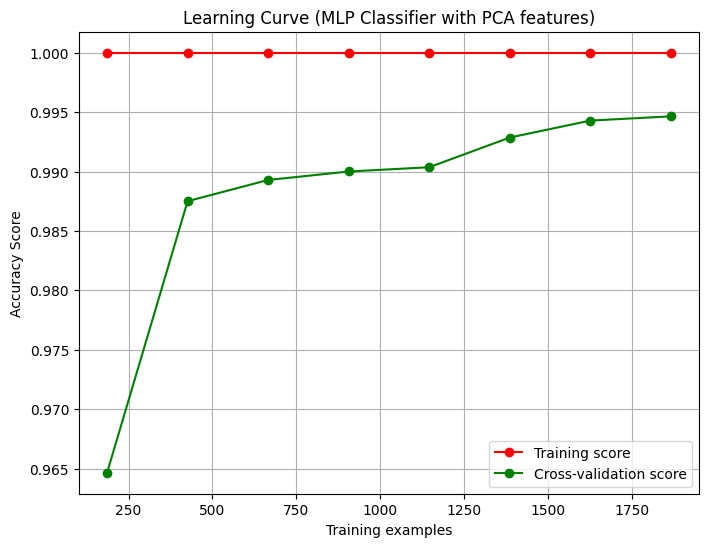

In [7]:
# Plot learning curve for MLP classifier with PCA features

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best estimator from grid search, or define your own
mlp = grid_search_MLP_PCA.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    mlp,
    X_train_pca,
    y_train,
    cv=3,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    verbose=1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (MLP Classifier with PCA features)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

##  Κανονικοποίηση & Linear Discriminant Analysis
- Πριν την LDA  εφαρμόσηκε «flatten» στα δεδομένα των εικόνων από (1000, 64,64) --> (1000, 4096) και κανονικοποίηση των τιμών των pixels με χρήση του standard scaler scikit learn [1]. Τα δεδομένα καταλήγουν με αυτόν τον τρόπο να έχουν μέση τιμή = 0 και τυπική απόκλιση=1.
- Ο μέγιστος αρθμος cmponents που μπορεί η LDA να βρέι έιναι ισος με τον αριθμό των κλάσεων-1 αρα για εμένα ίσος με 3.


In [8]:
# LDA (Linear Discriminant Analysis) 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Flatten images for LDA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(f"Flattened train shape: {X_train_flat.shape}")
print(f"Flattened test shape: {X_test_flat.shape}")
# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)

# Number of LDA components (at most n_classes - 1)
n_classes = len(np.unique(y_train))
n_components = n_classes - 1

# Fit LDA on training data
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print("LDA reduced train shape:", X_train_lda.shape)
print("LDA reduced test shape:", X_test_lda.shape)

Flattened train shape: (2800, 4096)
Flattened test shape: (1200, 4096)
LDA reduced train shape: (2800, 3)
LDA reduced test shape: (1200, 3)


##  MLP με μείωση διαστάσεων με χρήση  LDA
- Και πάλι εξαιρετικά αποτελέσματα απο το 3 κιόλας iteration

In [9]:
# MLP Neural Network classification with LDA features

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the MLPClassifier
mlp_lda = MLPClassifier(
    hidden_layer_sizes=(100,),  # You can adjust the size and number of layers
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    verbose=True
)

# Fit the model on LDA-reduced training data
mlp_lda.fit(X_train_lda, y_train)

# Predict on test set
y_pred = mlp_lda.predict(X_test_lda)

# Evaluate
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nMLP Classification Report:\n", classification_report(y_test, y_pred))

Iteration 1, loss = 13.06674326
Iteration 2, loss = 1.69112884
Iteration 3, loss = 0.00273572
Iteration 4, loss = 0.00031168
Iteration 5, loss = 0.00026199
Iteration 6, loss = 0.00023022
Iteration 7, loss = 0.00021082
Iteration 8, loss = 0.00019930
Iteration 9, loss = 0.00018496
Iteration 10, loss = 0.00017215
Iteration 11, loss = 0.00016626
Iteration 12, loss = 0.00015613
Iteration 13, loss = 0.00014875
Iteration 14, loss = 0.00014123
Iteration 15, loss = 0.00013428
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP Test Accuracy: 0.9208333333333333

MLP Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.93      1.00      0.96       300
   BreastMRI       0.93      1.00      0.96       300
        Hand       0.95      0.80      0.87       300
      HeadCT       0.87      0.88      0.88       300

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92  

## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [ 17   5 240  38]
 [  6  17  12 265]]


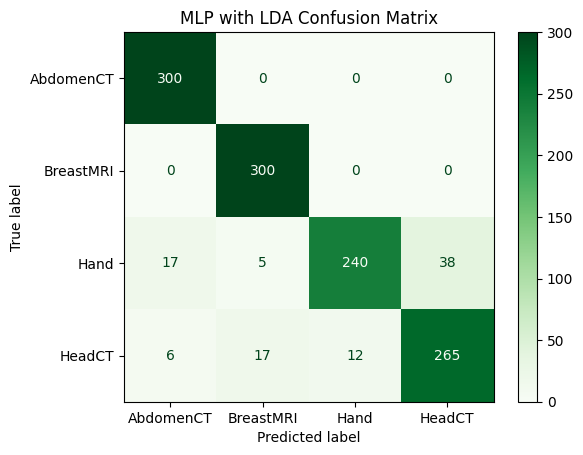

Accuracy: 0.9208
Precision (macro): 0.9219
Recall (macro): 0.9208
F1 Score (macro): 0.9191

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.93      1.00      0.96       300
   BreastMRI       0.93      1.00      0.96       300
        Hand       0.95      0.80      0.87       300
      HeadCT       0.87      0.88      0.88       300

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200



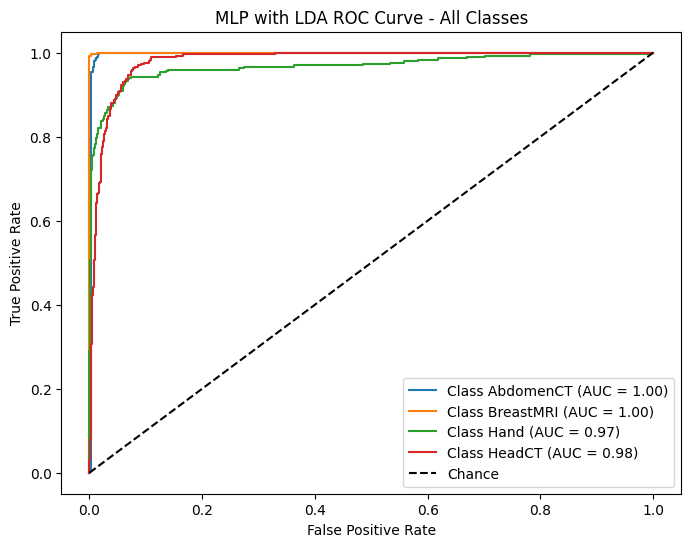

In [10]:
assess_model_performance(mlp_lda, X_test_lda, y_test, class_labels=np.unique(y_train), title_prefix="MLP with LDA")

## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρων (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

- Κοστοόρο υπολογιστικά για να διακιολογίσει τη χρήση του.

In [11]:
# Grid search for best hyperparameters in MLP Neural Network with LDA features

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150,)],
    'activation': ['relu', 'tanh', "logistic"],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [300]
}

# Initialize MLPClassifier
mlp = MLPClassifier(random_state=42)

# GridSearchCV setup
grid_search_MLP_LDA = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Fit on LDA-reduced training data
grid_search_MLP_LDA.fit(X_train_lda, y_train)

# Best parameters and score
print("Best parameters found:", grid_search_MLP_LDA.best_params_)
print("Best cross-validation score:", grid_search_MLP_LDA.best_score_)

# Evaluate on test set
y_pred = grid_search_MLP_LDA.predict(X_test_lda)
print("MLP Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nMLP Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/odys/Desktop/ML_LOCAL_MAC/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'sgd'}
Best cross-validation score: 1.0
MLP Test Accuracy: 0.93

MLP Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      0.96      0.98       300
   BreastMRI       0.97      0.99      0.98       300
        Hand       0.92      0.86      0.89       300
      HeadCT       0.84      0.91      0.88       300

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



## Εκτύπωση γραμμής μάθησης για το μοντέλο με μείωση διαστάσεων με LDA

[learning_curve] Training set sizes: [ 186  426  666  906 1146 1386 1626 1866]
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END .................................................... total time=   0.1s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:    0.6s remaining:    0.6s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.3s finished


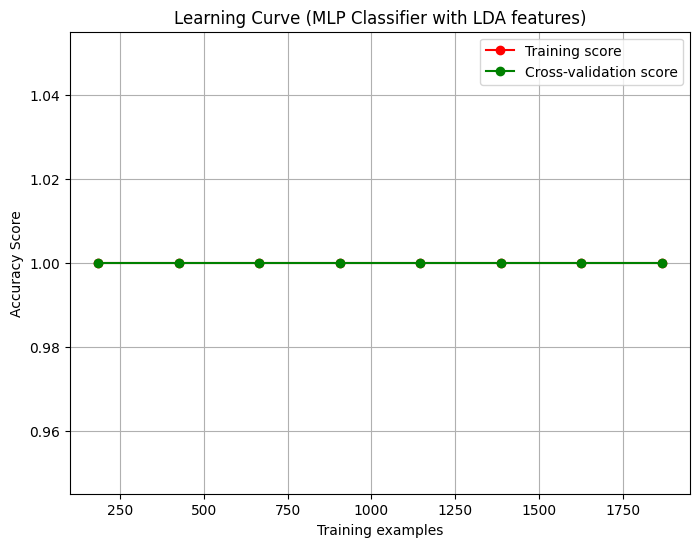

Exception ignored in: <function ResourceTracker.__del__ at 0x10b77c0e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10e0cc0e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/l

In [ ]:
# Plot learning curve for MLP classifier with LDA features

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best estimator from grid search, or define your own
mlp = grid_search_MLP_LDA.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(
    mlp,
    X_train_lda,
    y_train,
    cv=3,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    verbose=2
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve (MLP Classifier with LDA features)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()